In [13]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
import seaborn as sns

In [14]:
base_model_path = "keras-h5-model-model/model.h5"
base_model = tf.keras.models.load_model(base_model_path)
base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 1, 1, 256)         218544    
                                                                 
 reshape (Reshape)           (None, 1, 256)            0         
                                                                 
 dense (Dense)               (None, 1, 16)             4112      
                                                                 
 dropout (Dropout)           (None, 1, 16)             0         
                                                                 
 flatten (Flatten)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 34        
                                                                 
Total params: 222690 (869.88 KB)
Trainable params: 4146 

In [15]:
mob_net = base_model.layers[0]
mob_net.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 48, 48, 8)         216       
                                                                 
 conv1_bn (BatchNormalizati  (None, 48, 48, 8)         32        
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 48, 48, 8)         0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 48, 48, 8)         72        
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 48, 48, 8)         32    

In [16]:
base_model.layers[2].units


16

In [17]:
edgeimpulse_output_log = '''
Creating job... OK (ID: 13349054)

Scheduling job in cluster...
Still waiting for job to be scheduled...
Scheduling job in cluster...
Container image pulled!
Still waiting for job to be scheduled...
Container image pulled!
Job started
Job started
Splitting data into training and validation sets...
Splitting data into training and validation sets OK

Training model...
Training on 2668 inputs, validating on 667 inputs
Using batch size: 32
Epoch 1/20
84/84 - 6s - loss: 0.8145 - accuracy: 0.6259 - val_loss: 0.4599 - val_accuracy: 0.7886 - 6s/epoch - 67ms/step
Epoch 2/20
84/84 - 3s - loss: 0.4271 - accuracy: 0.8167 - val_loss: 0.2985 - val_accuracy: 0.8876 - 3s/epoch - 39ms/step
Epoch 3/20
84/84 - 3s - loss: 0.3175 - accuracy: 0.8752 - val_loss: 0.2461 - val_accuracy: 0.9025 - 3s/epoch - 38ms/step
Epoch 4/20
84/84 - 3s - loss: 0.2698 - accuracy: 0.8902 - val_loss: 0.2178 - val_accuracy: 0.9115 - 3s/epoch - 38ms/step
Epoch 5/20
84/84 - 3s - loss: 0.2442 - accuracy: 0.9007 - val_loss: 0.2006 - val_accuracy: 0.9175 - 3s/epoch - 38ms/step
Epoch 6/20
84/84 - 3s - loss: 0.2173 - accuracy: 0.9175 - val_loss: 0.1885 - val_accuracy: 0.9265 - 3s/epoch - 38ms/step
Epoch 7/20
84/84 - 3s - loss: 0.2068 - accuracy: 0.9209 - val_loss: 0.1785 - val_accuracy: 0.9280 - 3s/epoch - 38ms/step
Epoch 8/20
84/84 - 3s - loss: 0.1943 - accuracy: 0.9262 - val_loss: 0.1709 - val_accuracy: 0.9280 - 3s/epoch - 38ms/step
Epoch 9/20
84/84 - 3s - loss: 0.1905 - accuracy: 0.9250 - val_loss: 0.1657 - val_accuracy: 0.9325 - 3s/epoch - 38ms/step
Epoch 10/20
84/84 - 3s - loss: 0.1746 - accuracy: 0.9318 - val_loss: 0.1602 - val_accuracy: 0.9340 - 3s/epoch - 37ms/step
Epoch 11/20
84/84 - 3s - loss: 0.1816 - accuracy: 0.9318 - val_loss: 0.1562 - val_accuracy: 0.9355 - 3s/epoch - 38ms/step
Epoch 12/20
84/84 - 3s - loss: 0.1681 - accuracy: 0.9400 - val_loss: 0.1523 - val_accuracy: 0.9370 - 3s/epoch - 37ms/step
Epoch 13/20
84/84 - 3s - loss: 0.1633 - accuracy: 0.9415 - val_loss: 0.1501 - val_accuracy: 0.9400 - 3s/epoch - 37ms/step
Epoch 14/20
84/84 - 3s - loss: 0.1632 - accuracy: 0.9419 - val_loss: 0.1472 - val_accuracy: 0.9460 - 3s/epoch - 38ms/step
Epoch 15/20
84/84 - 3s - loss: 0.1499 - accuracy: 0.9460 - val_loss: 0.1453 - val_accuracy: 0.9445 - 3s/epoch - 38ms/step
Epoch 16/20
84/84 - 3s - loss: 0.1492 - accuracy: 0.9438 - val_loss: 0.1443 - val_accuracy: 0.9445 - 3s/epoch - 37ms/step
Epoch 17/20
84/84 - 3s - loss: 0.1482 - accuracy: 0.9442 - val_loss: 0.1418 - val_accuracy: 0.9535 - 3s/epoch - 38ms/step
Epoch 18/20
84/84 - 3s - loss: 0.1475 - accuracy: 0.9427 - val_loss: 0.1402 - val_accuracy: 0.9535 - 3s/epoch - 38ms/step
Epoch 19/20
84/84 - 3s - loss: 0.1412 - accuracy: 0.9460 - val_loss: 0.1380 - val_accuracy: 0.9505 - 3s/epoch - 38ms/step
Epoch 20/20
84/84 - 3s - loss: 0.1327 - accuracy: 0.9524 - val_loss: 0.1373 - val_accuracy: 0.9505 - 3s/epoch - 38ms/step

Initial training done.
Fine-tuning best model for 10 epochs...
Epoch 1/10
84/84 - 5s - loss: 0.1292 - accuracy: 0.9535 - val_loss: 0.1377 - val_accuracy: 0.9505 - 5s/epoch - 61ms/step
Epoch 2/10
84/84 - 3s - loss: 0.1461 - accuracy: 0.9434 - val_loss: 0.1377 - val_accuracy: 0.9520 - 3s/epoch - 38ms/step
Epoch 3/10
84/84 - 3s - loss: 0.1317 - accuracy: 0.9513 - val_loss: 0.1377 - val_accuracy: 0.9520 - 3s/epoch - 37ms/step
Epoch 4/10
84/84 - 3s - loss: 0.1376 - accuracy: 0.9498 - val_loss: 0.1372 - val_accuracy: 0.9505 - 3s/epoch - 38ms/step
Epoch 5/10
84/84 - 3s - loss: 0.1337 - accuracy: 0.9513 - val_loss: 0.1373 - val_accuracy: 0.9520 - 3s/epoch - 37ms/step
Epoch 6/10
84/84 - 3s - loss: 0.1351 - accuracy: 0.9513 - val_loss: 0.1374 - val_accuracy: 0.9505 - 3s/epoch - 37ms/step
Epoch 7/10
84/84 - 3s - loss: 0.1371 - accuracy: 0.9516 - val_loss: 0.1365 - val_accuracy: 0.9505 - 3s/epoch - 38ms/step
Epoch 8/10
84/84 - 3s - loss: 0.1266 - accuracy: 0.9550 - val_loss: 0.1368 - val_accuracy: 0.9520 - 3s/epoch - 36ms/step
Epoch 9/10
84/84 - 3s - loss: 0.1370 - accuracy: 0.9487 - val_loss: 0.1366 - val_accuracy: 0.9505 - 3s/epoch - 37ms/step
Epoch 10/10
84/84 - 3s - loss: 0.1315 - accuracy: 0.9550 - val_loss: 0.1366 - val_accuracy: 0.9505 - 3s/epoch - 37ms/step
Finished training

Saving best performing model... (based on validation loss)
Still saving model...
Saving best performing model OK

Converting TensorFlow Lite float32 model...
Converting TensorFlow Lite int8 quantized model...
Loading data for profiling...
Loading data for profiling OK

Creating embeddings...
[   0/3335] Creating embeddings...
[2200/3335] Creating embeddings...
[3335/3335] Creating embeddings...
Creating embeddings OK (took 19 seconds)

Calculating performance metrics...
Profiling float32 model...
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
Profiling int8 model...

Model training complete

Job completed
'''

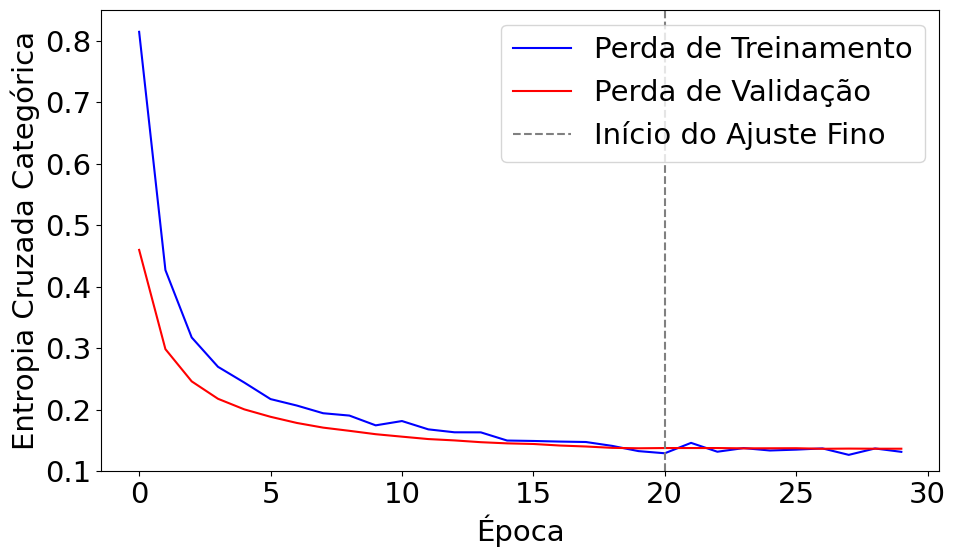

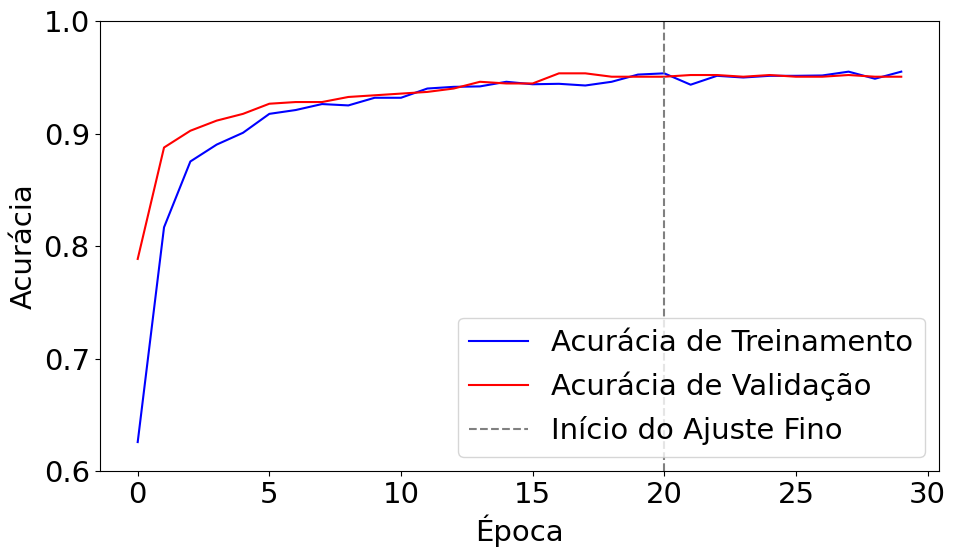

In [18]:
# Load the training and validation data
train_loss = [0.8145, 0.4271, 0.3175, 0.2698, 0.2442, 0.2173, 0.2068, 0.1943, 0.1905, 0.1746, 0.1816, 0.1681, 0.1633, 0.1632, 0.1499, 0.1492, 0.1482, 0.1475, 0.1412, 0.1327]
val_loss = [0.4599, 0.2985, 0.2461, 0.2178, 0.2006, 0.1885, 0.1785, 0.1709, 0.1657, 0.1602, 0.1562, 0.1523, 0.1501, 0.1472, 0.1453, 0.1443, 0.1418, 0.1402, 0.1380, 0.1373]
train_accuracy = [0.6259, 0.8167, 0.8752, 0.8902, 0.9007, 0.9175, 0.9209, 0.9262, 0.9250, 0.9318, 0.9318, 0.9400, 0.9415, 0.9419, 0.9460, 0.9438, 0.9442, 0.9427, 0.9460, 0.9524]
val_accuracy = [0.7886, 0.8876, 0.9025, 0.9115, 0.9175, 0.9265, 0.9280, 0.9280, 0.9325, 0.9340, 0.9355, 0.9370, 0.9400, 0.9460, 0.9445, 0.9445, 0.9535, 0.9535, 0.9505, 0.9505]

# Load the fine-tuning data
fine_tuning_loss = [0.1292, 0.1461, 0.1317, 0.1376, 0.1337, 0.1351, 0.1371, 0.1266, 0.1370, 0.1315]
fine_tuning_accuracy = [0.9535, 0.9434, 0.9513, 0.9498, 0.9513, 0.9513, 0.9516, 0.9550, 0.9487, 0.9550]

# Combine the training and fine-tuning data
train_loss += fine_tuning_loss
train_accuracy += fine_tuning_accuracy

# Load validation loss and accuracy values
fine_tuning_val_loss = [0.1377, 0.1377, 0.1377, 0.1372, 0.1373, 0.1374, 0.1365, 0.1368, 0.1366, 0.1366]
fine_tuning_val_accuracy = [0.9505, 0.9520, 0.9520, 0.9505, 0.9520, 0.9505, 0.9505, 0.9520, 0.9505, 0.9505]

# Combine the validation data
val_loss += fine_tuning_val_loss
val_accuracy += fine_tuning_val_accuracy

# Aumentando o tamanho das fontes nos gráficos
plt.rcParams.update({'font.size': 21})

# Plotar a perda
plt.figure(figsize=(10, 6))
plt.plot(train_loss, 'b-', label='Perda de Treinamento')
plt.plot(val_loss, 'r-', label='Perda de Validação')
plt.axvline(x=20, color='gray', linestyle='--', label='Início do Ajuste Fino')
plt.xlabel('Época')
plt.ylabel('Entropia Cruzada Categórica')
plt.ylim([0.1, 0.85])
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
plt.legend()
plt.tight_layout()
plt.savefig('perda.pdf', dpi=300)
plt.show()

# Plotar a acurácia
plt.figure(figsize=(10, 6))
plt.plot(train_accuracy, 'b-', label='Acurácia de Treinamento')
plt.plot(val_accuracy, 'r-', label='Acurácia de Validação')
plt.axvline(x=20, color='gray', linestyle='--', label='Início do Ajuste Fino')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.ylim([0.6, 1])
plt.yticks([0.6, 0.7, 0.8, 0.9, 1])
plt.legend()
plt.tight_layout()
plt.savefig('acuracia.pdf', dpi=300,)
plt.show()


In [19]:
# load test dataset
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

In [20]:
# doing some processing...
y_test = y_test[:, 0] - 1 # make sure to retain only the labels values and set it to 0 and one

In [21]:
# creating a `class_names` list to map numerical labels
class_names = ['fogo', 'normal']

In [22]:
IMG_SHAPE = (96, 96, 3) # defining image shape that was used in the transfer-learning model
X_test = X_test.reshape((-1, 96, 96, 3)) # the data here is already normalized
print(X_test.shape)
print(X_test.max(), X_test.min())

(842, 96, 96, 3)
1.0 0.0


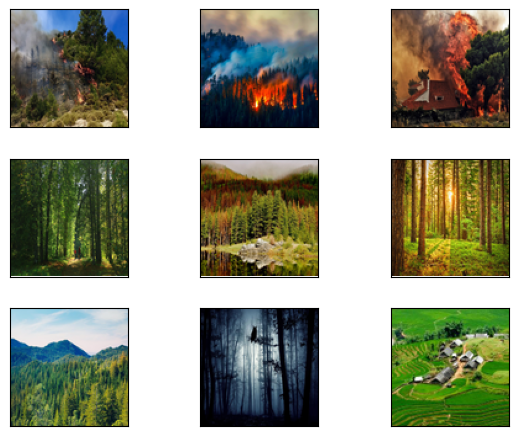

In [23]:
# showing some examples, to see if its valid
images = X_test[:9]

# Plot the images
fig, axes = plt.subplots(3, 3)
for i in range(3):
    for j in range(3):
        axes[i, j].imshow(images[i * 3 + j])
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])
plt.tight_layout()
plt.show()

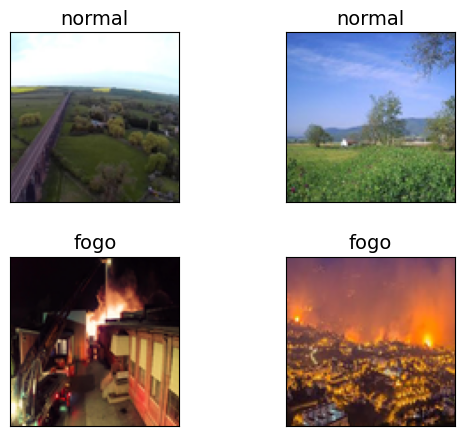

In [24]:
idx = np.random.choice(range(len(y_test)), size=4, replace=False)

images = X_test[idx]
labels = y_test[idx]
# Plot the images
fig, axes = plt.subplots(2, 2)
for i in range(2):
    for j in range(2):
        axes[i, j].imshow(images[i * 2 + j])
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])
        axes[i, j].set_title(class_names[labels[i * 2 + j]], fontsize=14)
plt.tight_layout()
plt.savefig('exemplo_teste.pdf', dpi=300)
plt.show()

In [25]:
# now lets compare both models the float32 and the int8 quantized one
# first create a variable as an alias for the file path
# here we are using the tensorflow light versions
# keras h5 and tensorflow_model versions are also provided

f32model = "tensorflow-lite-float32-model.lite"
i8model = "tensorflow-lite-int8-quantized-model.lite"

In [26]:
def quantize_input(input_data, input_details):
    # input data should be normalized
    scale = input_details[0]['quantization'][0]
    zero_point = input_details[0]['quantization'][1]

    quantized_input = np.round(input_data / scale + zero_point)

    return quantized_input

def dequantize_output(quantized_output, output_details):
    scale = output_details[0]['quantization'][0]
    zero_point = output_details[0]['quantization'][1]

    # Dequantize output
    real_output = scale * (quantized_output.astype(np.float32) - zero_point)

    return real_output

# now create a function that helps to do inferences on the model
def evaluate(filepath,
             X,
             from_logits=True):
    
    # Allocate interpreter
    interpreter = tf.lite.Interpreter(model_path=filepath)
    interpreter.allocate_tensors()

    # Get input and output tensors.
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    # Get input and output shapes
    input_shape = input_details[0]['shape']
    # output_shape = output_details[0]['shape']

    # Assert input dimensions are correct
    assert (X.shape[1::] == input_shape[1::]).all()

    
    # set a quantized check
    input_type = input_details[0]['dtype']
    is_quantized = input_type == np.int8

    output_data = []
    # evaluate the model on the provided dataset
    for i , input_data in enumerate(X):
        # quantize if input dtype is int8
        if is_quantized:
            input_data = quantize_input(input_data, input_details)

        # add batch dimension to input_data
        input_data = np.expand_dims(input_data, axis=0).astype(input_type)
        # set interpreter
        interpreter.set_tensor(input_details[0]['index'], input_data)

        interpreter.invoke()

        # The function `get_tensor()` returns a copy of the tensor data.
        # Use `tensor()` in order to get a pointer to the tensor.
        logits = interpreter.get_tensor(output_details[0]['index'])

        if is_quantized:
            logits = dequantize_output(logits, output_details)

        output_data.append(logits)

    # squeeze the unnecessarily dimensions 
    output_data = np.squeeze(output_data)
    
    # return data
    return output_data if from_logits else np.argmax(output_data, axis=1)

In [27]:
y_pred_f32 = evaluate(f32model, X_test, False)
print(classification_report(y_test, y_pred_f32, digits=3))

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


              precision    recall  f1-score   support

           0      0.953     0.958     0.955       424
           1      0.957     0.952     0.954       418

    accuracy                          0.955       842
   macro avg      0.955     0.955     0.955       842
weighted avg      0.955     0.955     0.955       842



In [28]:
y_pred_i8 = evaluate(i8model, X_test, False)
y_pred_i8_logits = evaluate(i8model, X_test, True)
print(classification_report(y_test, y_pred_i8, digits=3))

              precision    recall  f1-score   support

           0      0.976     0.950     0.963       424
           1      0.951     0.976     0.963       418

    accuracy                          0.963       842
   macro avg      0.963     0.963     0.963       842
weighted avg      0.964     0.963     0.963       842



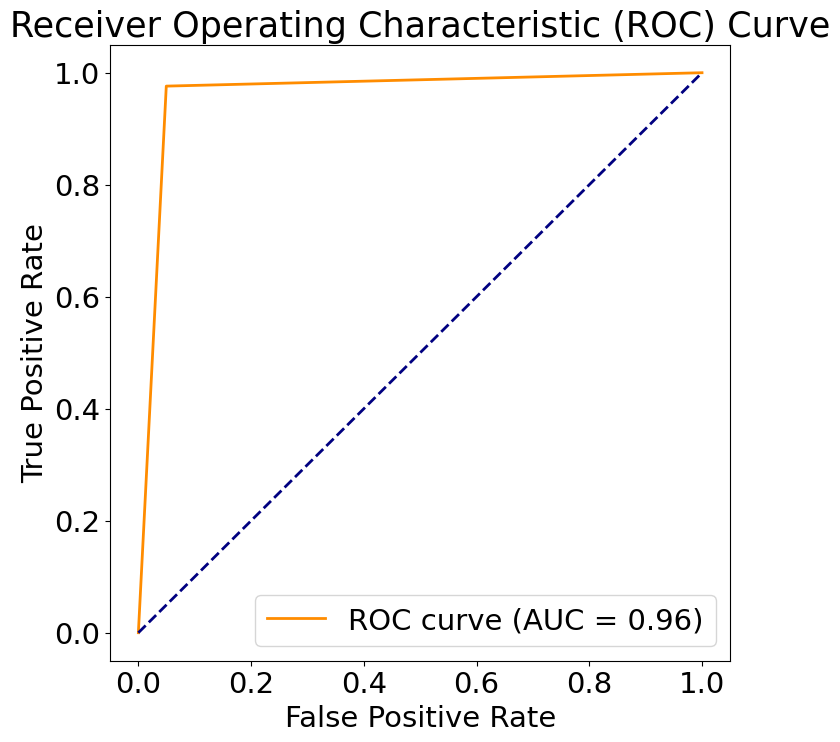

In [29]:
# Compute ROC curve and area under the curve (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_i8)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

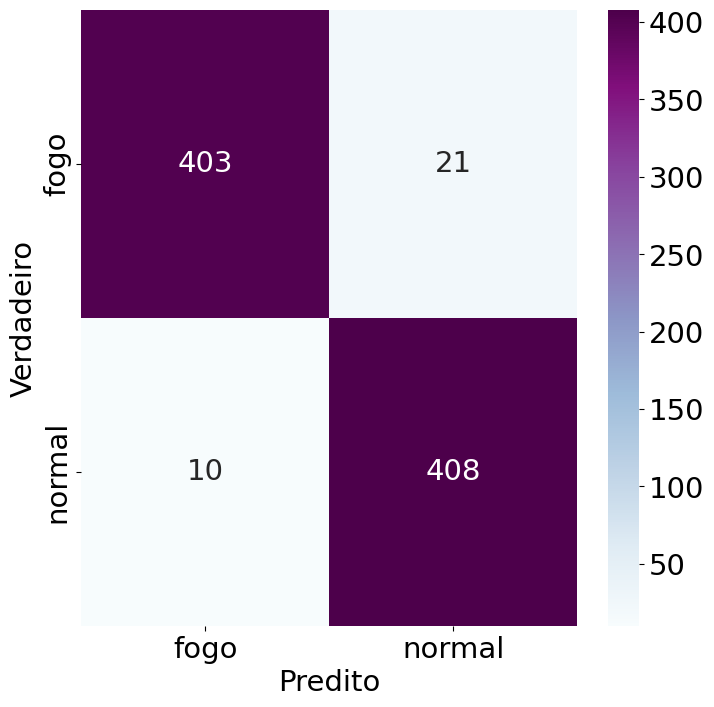

In [30]:
cm = confusion_matrix(y_test, y_pred_i8)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
#plt.title('Confusion Matrix')
plt.savefig('confusao.pdf', dpi=300)
plt.show()

In [31]:
cm

array([[403,  21],
       [ 10, 408]])

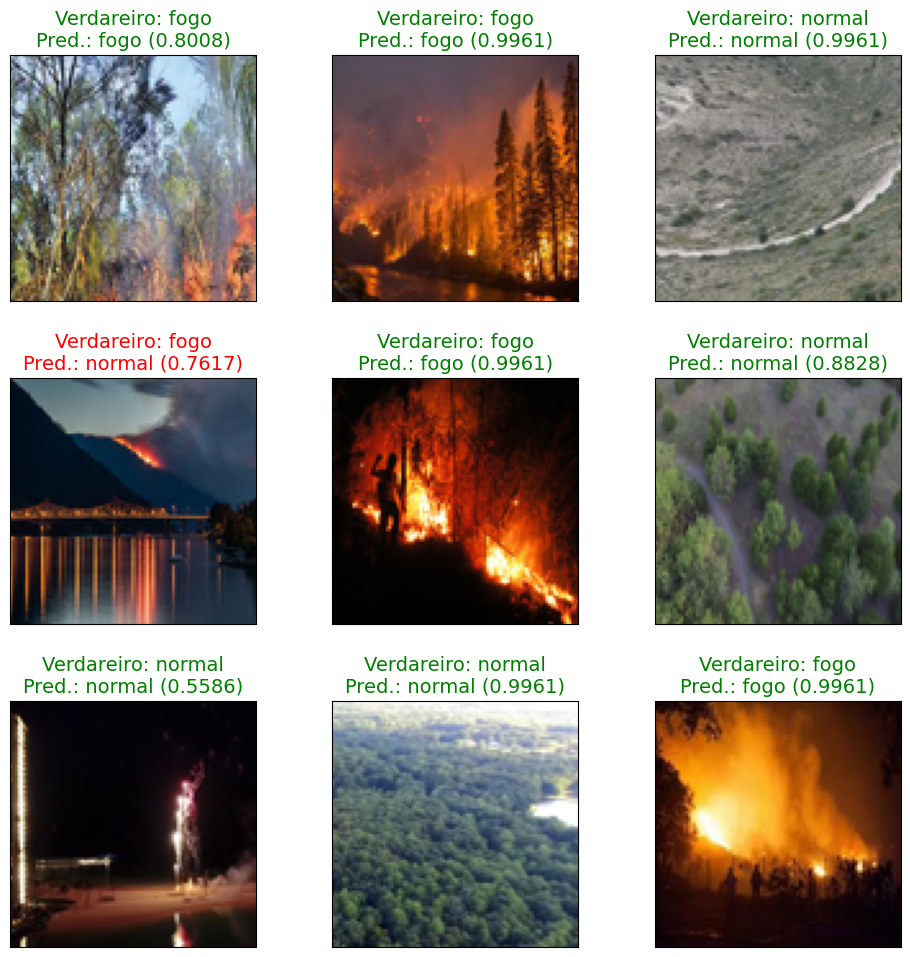

In [36]:
# Plot the images with predictions and percentages
# Show a grid of 3x3 images with predictions and percentages
fontsize = 14
# idx = np.random.choice(range(len(y_test)), size=9, replace=False)
idx = [662, 734, 129, 780, 837, 238, 189,  79, 784]
images = X_test[idx]
labels = y_test[idx]
predictions = y_pred_i8[idx]
percents = y_pred_i8_logits[idx].max(axis=1)

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i in range(3):
    for j in range(3):
        index = i * 3 + j
        axes[i, j].imshow(images[index])
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])
        true_label = class_names[labels[index]]
        pred_label = class_names[predictions[index]]
        is_correct = labels[index] == predictions[index]
        percent = percents[index]
        color = 'green' if is_correct else 'red'
        axes[i, j].set_title(f'Verdareiro: {true_label}\nPred.: {pred_label} ({percent:.4f})', color=color, fontsize=fontsize)

plt.tight_layout()
plt.savefig('example.pdf', dpi=300)
plt.show()

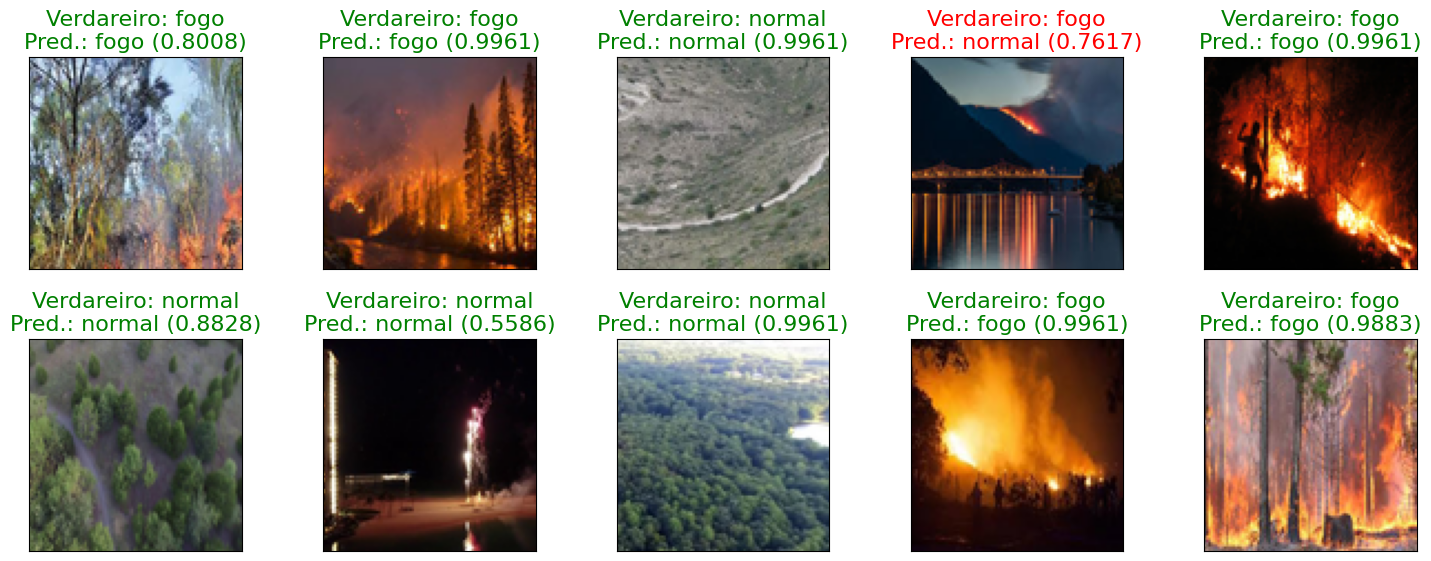

In [43]:
fontsize = 16
# idx = np.random.choice(range(len(y_test)), size=10, replace=False)
idx = [662, 734, 129, 780, 837, 238, 189,  79, 784, 452]
images = X_test[idx]
labels = y_test[idx]
predictions = y_pred_i8[idx]
percents = y_pred_i8_logits[idx].max(axis=1)

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i in range(2):
    for j in range(5):
        index = i * 5 + j
        axes[i, j].imshow(images[index])
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])
        true_label = class_names[labels[index]]
        pred_label = class_names[predictions[index]]
        is_correct = labels[index] == predictions[index]
        percent = percents[index]
        color = 'green' if is_correct else 'red'
        axes[i, j].set_title(f'Verdareiro: {true_label}\nPred.: {pred_label} ({percent:.4f})', color=color, fontsize=fontsize)

plt.tight_layout()
plt.savefig('example.pdf', dpi=300)
plt.show()